In [1]:
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
data_path = "/Users/nus/aurek-data-crunch/data/"

In [4]:
acc = pd.read_csv(data_path+"empatica/1FPYJ1111T/acc.csv", index_col="Unix Timestamp (UTC)")

/Users/nus/anaconda/envs/ipykernel_py3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
acc.index = pd.to_datetime(acc.index, unit='ms')

In [6]:
acc.index

DatetimeIndex(['2019-03-25 13:33:17.768000', '2019-03-25 13:33:17.799000',
               '2019-03-25 13:33:17.830000', '2019-03-25 13:33:17.861000',
               '2019-03-25 13:33:17.892000', '2019-03-25 13:33:17.923000',
               '2019-03-25 13:33:17.954000', '2019-03-25 13:33:17.985000',
               '2019-03-25 13:33:18.016000', '2019-03-25 13:33:18.047000',
               ...
               '2019-04-18 09:07:56.305000', '2019-04-18 09:07:56.336000',
               '2019-04-18 09:07:56.367000', '2019-04-18 09:07:56.398000',
               '2019-04-18 09:07:56.428000', '2019-04-18 09:07:56.459000',
               '2019-04-18 09:07:56.490000', '2019-04-18 09:07:56.521000',
               '2019-04-18 09:07:56.552000', '2019-04-18 09:07:56.583000'],
              dtype='datetime64[ns]', name='Unix Timestamp (UTC)', length=19114455, freq=None)

In [7]:
acc.index = acc.index.tz_localize("UTC").tz_convert("Singapore").tz_localize(None)

In [8]:
acc = acc.astype("float")

In [9]:
acc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19114455 entries, 2019-03-25 21:33:17.768000 to 2019-04-18 17:07:56.583000
Data columns (total 3 columns):
x (g)    float64
y (g)    float64
z (g)    float64
dtypes: float64(3)
memory usage: 583.3 MB


In [10]:
acc_min = acc.resample("min").mean()

In [11]:
acc_min.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34295 entries, 2019-03-25 21:33:00 to 2019-04-18 17:07:00
Freq: T
Data columns (total 3 columns):
x (g)    9871 non-null float64
y (g)    9871 non-null float64
z (g)    9871 non-null float64
dtypes: float64(3)
memory usage: 1.0 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x112c89470>,
      dtype=object)

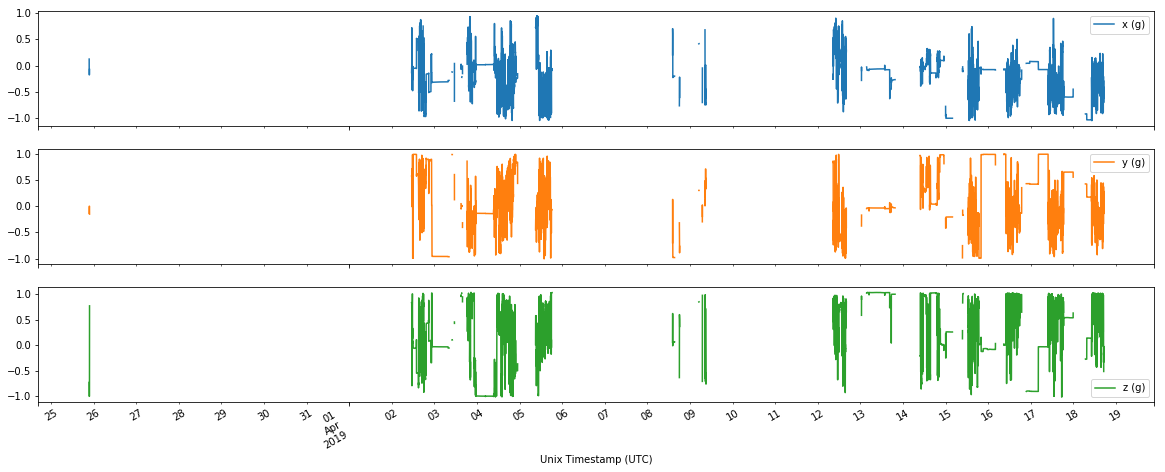

In [12]:
acc_min.plot(subplots=True, figsize=(20,8))

In [13]:
def get_empatica_data(data_path, device, point):
    df = pd.read_csv(data_path+"/empatica/"+device+"/"+point+".csv", index_col="Unix Timestamp (UTC)")
    df.index = pd.to_datetime(df.index, unit='ms')
    df.index = df.index.tz_localize("UTC").tz_convert("Singapore").tz_localize(None)
    df = df.astype("float")
    return df.resample("min").mean()
    
                     

In [14]:
aurek2_device = "2KMX2111GF"

In [15]:
aurek1_eda = get_empatica_data(data_path, aurek2_device,"eda")


/Users/nus/anaconda/envs/ipykernel_py3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [17]:
#device1_eda.plot(figsize=(20,8))

In [20]:
#device1_eda.hist(bins=50, figsize=(20,4))

In [21]:
aurek_time = pd.read_csv(data_path+"aurek_empatica_mapping - aurek-empatica mapping.csv")

In [22]:
aurek_time[aurek_time.participantID == "aurek2"]

,participantID,deviceID,subjectID,start_date,end_date
7,aurek2,2KMX2111GF,001 - 001 - 015,"April 15, 2019","April 18, 2019"


In [23]:
start_time = aurek_time[aurek_time.participantID == "aurek2"].dropna().start_date.values[0]
end_time = aurek_time[aurek_time.participantID == "aurek2"].dropna().end_date.values[0]

In [24]:
start_time

'April 15, 2019'

In [28]:
#device1_eda_single = device1_eda.truncate(before=start_time, after=end_time)



In [29]:
#device1_eda_single["EDA (microS)"].head()

In [30]:
cozie = pd.read_csv(data_path+"cozie.csv")

In [31]:
cozie = cozie.pivot(index="Unnamed: 0", columns="user_id", values='thermal')

In [33]:
cozie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1552 entries, 2019-01-18 01:20:30.032000+08:00 to 2019-04-22 13:11:33.913000192+08:00
Data columns (total 24 columns):
Raring Ringtail     142 non-null float64
Saucy Salamander    58 non-null float64
Utopic Unicorn      271 non-null float64
Vivid Vervet        226 non-null float64
Wily Werewolf       132 non-null float64
Yakkety Yak         52 non-null float64
Zesty Zapus         119 non-null float64
aurek1              101 non-null float64
aurek10             143 non-null float64
aurek14             18 non-null float64
aurek15             25 non-null float64
aurek16             8 non-null float64
aurek17             1 non-null float64
aurek18             1 non-null float64
aurek19             9 non-null float64
aurek2              49 non-null float64
aurek20             6 non-null float64
aurek25             4 non-null float64
aurek3              4 non-null float64
aurek4              1 non-null float64
aurek5              4 non-null float6

In [257]:
cozie.index = pd.to_datetime(cozie.index)

In [258]:
cozie_hr = cozie.resample("H").max()#.describe()

In [259]:
cozie_hr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2269 entries, 2019-01-17 17:00:00 to 2019-04-22 05:00:00
Freq: H
Data columns (total 24 columns):
Raring Ringtail     15 non-null float64
Saucy Salamander    53 non-null float64
Utopic Unicorn      164 non-null float64
Vivid Vervet        110 non-null float64
Wily Werewolf       107 non-null float64
Yakkety Yak         33 non-null float64
Zesty Zapus         68 non-null float64
aurek1              83 non-null float64
aurek10             66 non-null float64
aurek14             17 non-null float64
aurek15             23 non-null float64
aurek16             6 non-null float64
aurek17             1 non-null float64
aurek18             1 non-null float64
aurek19             7 non-null float64
aurek2              43 non-null float64
aurek20             5 non-null float64
aurek25             1 non-null float64
aurek3              4 non-null float64
aurek4              1 non-null float64
aurek5              3 non-null float64
aurek7         

In [284]:
cozie.melt().value.value_counts()

10.0    1072
11.0     322
9.0      158
Name: value, dtype: int64

In [287]:
cozie[aurek_time.participantID].melt().value.value_counts()

10.0    401
11.0     92
9.0      38
Name: value, dtype: int64

In [260]:
aurek2_merged = pd.concat([cozie_hr['aurek2'], device1_eda_single["EDA (microS)"]], axis=1)

In [261]:
aurek2_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6517 entries, 2019-01-17 17:00:00 to 2019-04-22 05:00:00
Data columns (total 2 columns):
aurek2          43 non-null float64
EDA (microS)    3201 non-null float64
dtypes: float64(2)
memory usage: 152.7 KB


In [262]:
aurek2_merged.resample("H").mean().dropna()

,aurek2,EDA (microS)
2019-04-15 01:00:00,11.0,0.025861
2019-04-15 04:00:00,11.0,0.012733
2019-04-15 05:00:00,10.0,2.683446


# Loop through all

In [263]:
aurek_time = aurek_time.dropna()

In [264]:
aurek_time

,participantID,deviceID,subjectID,start_date,end_date
0,aurek18,2KMX211173,001 - 001 - 012,"April 15, 2019","April 18, 2019"
1,aurek19,1FPYJ1111T,001 - 001 - 001,"April 15, 2019","April 18, 2019"
2,Saucy Salamander,2KMX211173,001 - 001 - 012,"April 9, 2019","April 12, 2019"
3,aurek5,2KMX2111GF,001 - 001 - 015,"April 2, 2019","April 5, 2019"
4,aurek7,1FPYJ1111T,001 - 001 - 001,"April 9, 2019","April 12, 2019"
5,aurek8,2KMX2111GF,001 - 001 - 015,"April 9, 2019","April 12, 2019"
6,aurek10,1FPYJ1111T,001 - 001 - 001,"April 2, 2019","April 5, 2019"
7,aurek2,2KMX2111GF,001 - 001 - 015,"April 15, 2019","April 18, 2019"
8,aurek1,2KMX211173,001 - 001 - 012,"April 2, 2019","April 5, 2019"


In [265]:
total_empatica = []

aurek18
error
aurek19


/Users/nus/anaconda/envs/ipykernel_py3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


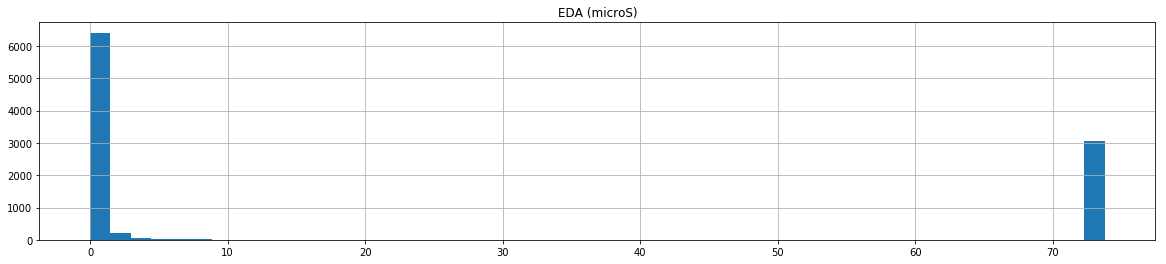

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Freq: H
Data columns (total 2 columns):
aurek19         0 non-null float64
EDA (microS)    0 non-null float64
dtypes: float64(2)
memory usage: 0.0 bytes
None
Saucy Salamander
error
aurek5


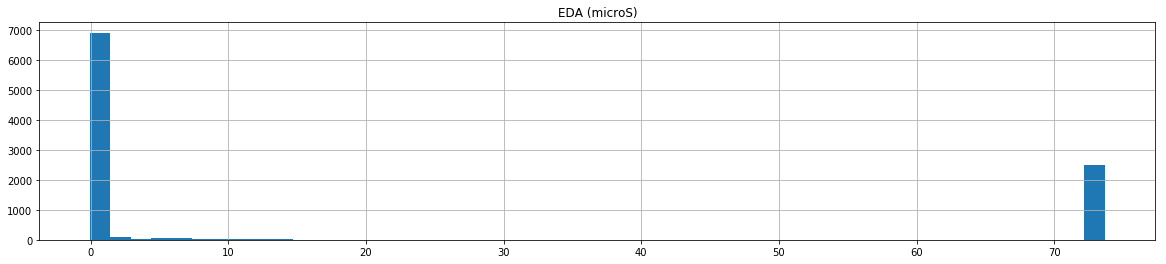

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3 entries, 2019-04-15 05:00:00 to 2019-04-15 09:00:00
Data columns (total 2 columns):
aurek5          3 non-null float64
EDA (microS)    3 non-null float64
dtypes: float64(2)
memory usage: 72.0 bytes
None
aurek7


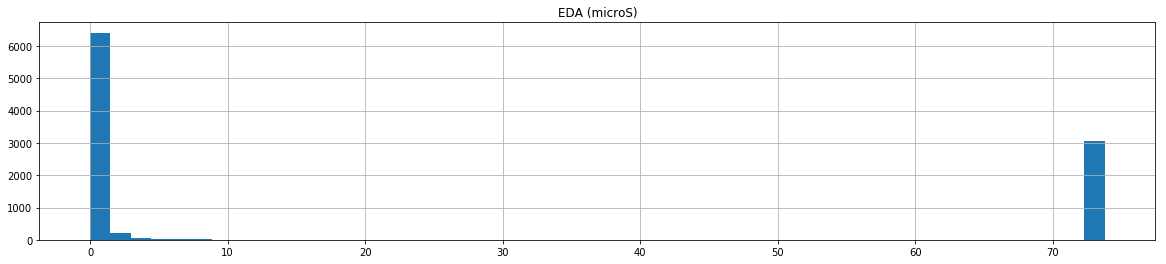

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14 entries, 2019-04-15 01:00:00 to 2019-04-17 09:00:00
Data columns (total 2 columns):
aurek7          14 non-null float64
EDA (microS)    14 non-null float64
dtypes: float64(2)
memory usage: 336.0 bytes
None
aurek8


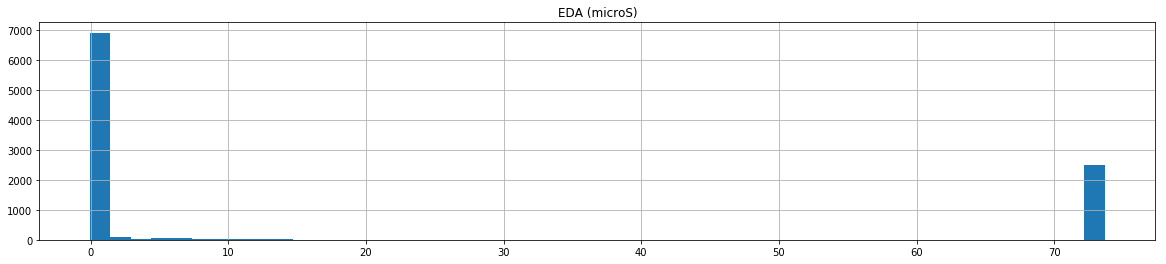

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8 entries, 2019-04-16 03:00:00 to 2019-04-17 09:00:00
Data columns (total 2 columns):
aurek8          8 non-null float64
EDA (microS)    8 non-null float64
dtypes: float64(2)
memory usage: 192.0 bytes
None
aurek10


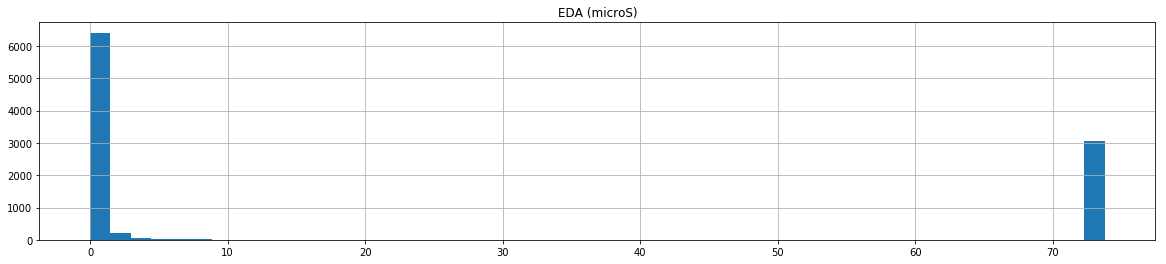

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Freq: H
Data columns (total 2 columns):
aurek10         0 non-null float64
EDA (microS)    0 non-null float64
dtypes: float64(2)
memory usage: 0.0 bytes
None
aurek2


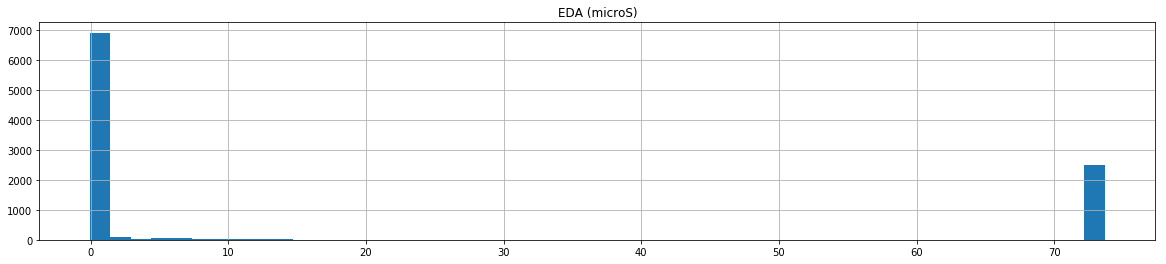

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3 entries, 2019-04-15 01:00:00 to 2019-04-15 05:00:00
Data columns (total 2 columns):
aurek2          3 non-null float64
EDA (microS)    3 non-null float64
dtypes: float64(2)
memory usage: 72.0 bytes
None
aurek1
error


In [315]:
total_empatica = []
for participant in aurek_time.participantID:
    print(participant)
    try:
        aurek_device = aurek_time[aurek_time.participantID == participant].deviceID.values[0]
        eda = get_empatica_data(data_path, aurek_device, "eda")
        eda.hist(bins=50, figsize=(20,4))
        plt.show()
        start_time = aurek_time[aurek_time.participantID == participant].dropna().start_date.values[0]
        end_time = aurek_time[aurek_time.participantID == participant].dropna().end_date.values[0]
        eda_single = eda.truncate(before=start_time, after=end_time)
        merged = pd.concat([cozie_hr[participant], device1_eda_single["EDA (microS)"]], axis=1)
        print(merged.resample("H").max().dropna().info())
        total = merged.resample("H").max().dropna()
        total.columns = ['votes', 'eda']
        total_empatica.append(total)
    except:
        print("error")


In [277]:
total_eda = pd.concat(total_empatica)

In [278]:
total_eda.votes = total_eda.votes.replace({9:"prefer warmer", 10:"comfy", 11:"prefer cooler"})

In [289]:
total_eda.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28 entries, 2019-04-15 05:00:00 to 2019-04-15 05:00:00
Data columns (total 2 columns):
votes    28 non-null object
eda      28 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.3+ KB


In [280]:
import matplotlib.pyplot as plt


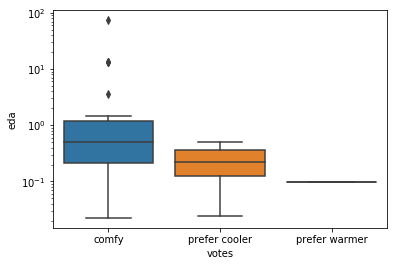

In [281]:
g = sns.boxplot(data=total_eda, y='eda', x='votes')
g.set_yscale('log')


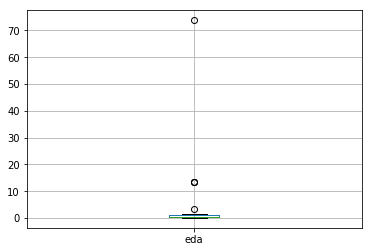

In [271]:
total_eda.boxplot()

# skin temp

In [292]:
#device1_eda_single

aurek18
error
aurek19


/Users/nus/anaconda/envs/ipykernel_py3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


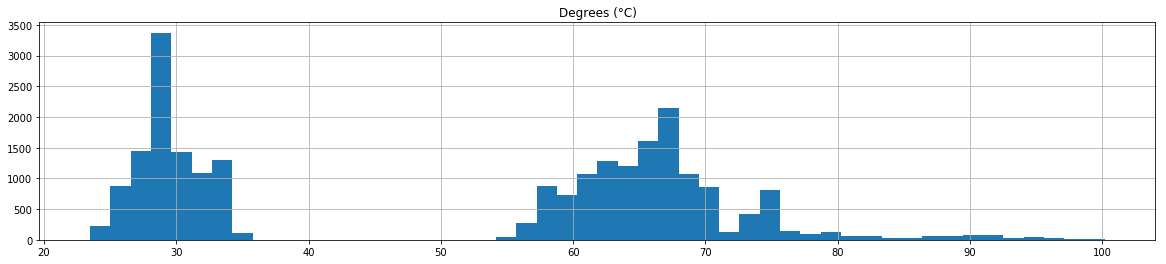

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Freq: H
Data columns (total 2 columns):
aurek19         0 non-null float64
Degrees (°C)    0 non-null float64
dtypes: float64(2)
memory usage: 0.0 bytes
None
Saucy Salamander
error
aurek5


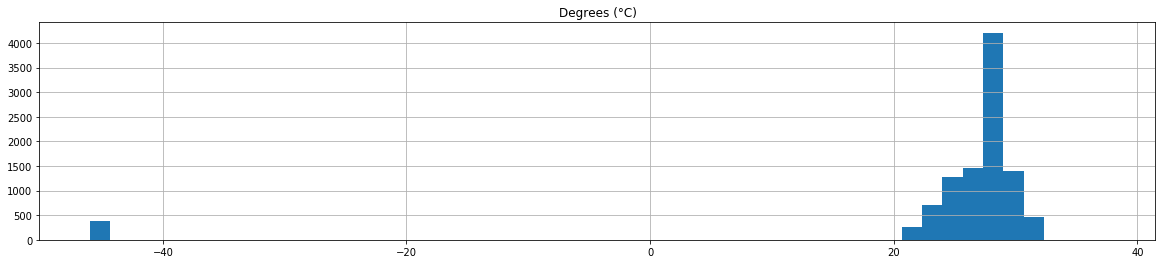

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Freq: H
Data columns (total 2 columns):
aurek5          0 non-null float64
Degrees (°C)    0 non-null float64
dtypes: float64(2)
memory usage: 0.0 bytes
None
aurek7


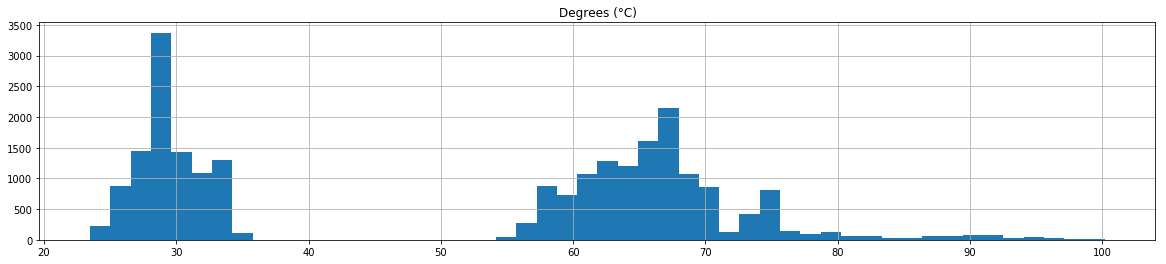

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2019-04-09 01:00:00 to 2019-04-09 09:00:00
Freq: 2H
Data columns (total 2 columns):
aurek7          5 non-null float64
Degrees (°C)    5 non-null float64
dtypes: float64(2)
memory usage: 120.0 bytes
None
aurek8


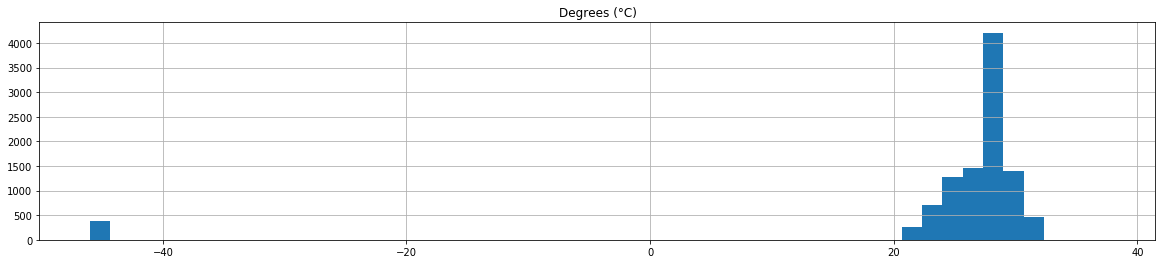

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13 entries, 2019-04-09 03:00:00 to 2019-04-11 09:00:00
Data columns (total 2 columns):
aurek8          13 non-null float64
Degrees (°C)    13 non-null float64
dtypes: float64(2)
memory usage: 312.0 bytes
None
aurek10


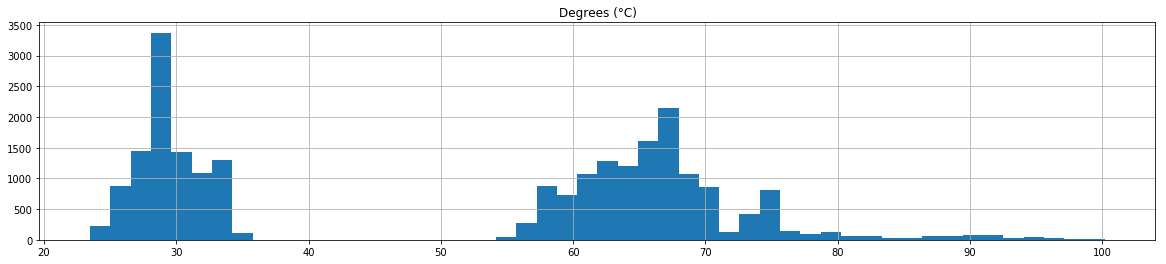

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2019-04-02 01:00:00 to 2019-04-02 07:00:00
Data columns (total 2 columns):
aurek10         6 non-null float64
Degrees (°C)    6 non-null float64
dtypes: float64(2)
memory usage: 144.0 bytes
None
aurek2


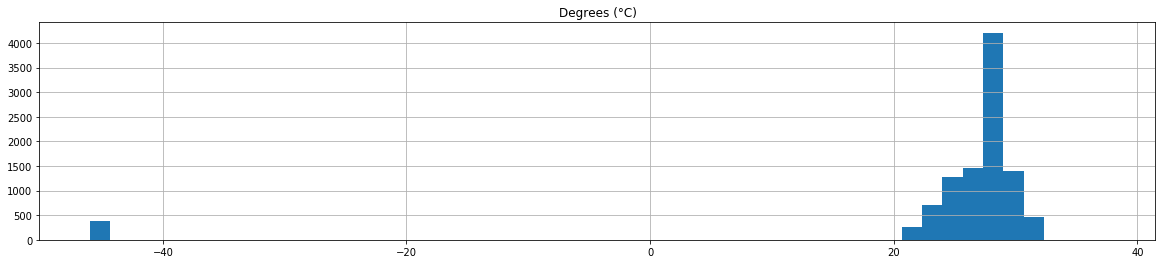

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Freq: H
Data columns (total 2 columns):
aurek2          0 non-null float64
Degrees (°C)    0 non-null float64
dtypes: float64(2)
memory usage: 0.0 bytes
None
aurek1
error


In [316]:
total_empatica = []
for participant in aurek_time.participantID:
    print(participant)
    try:
        aurek_device = aurek_time[aurek_time.participantID == participant].deviceID.values[0]
        df = get_empatica_data(data_path, aurek_device, "temp")
        df.hist(bins=50, figsize=(20,4))
        plt.show()
        start_time = aurek_time[aurek_time.participantID == participant].dropna().start_date.values[0]
        end_time = aurek_time[aurek_time.participantID == participant].dropna().end_date.values[0]
        df_single = df.truncate(before=start_time, after=end_time)
        merged = pd.concat([cozie_hr[participant], df_single["Degrees (°C)"]], axis=1)
        print(merged.resample("H").min().dropna().info())
        total = merged.resample("H").min().dropna()
        total.columns = ['votes', 'temp']
        total_empatica.append(total)
    except:
        print("error")


In [309]:
total_empatica

[Empty DataFrame
 Columns: [votes, temp]
 Index: [], Empty DataFrame
 Columns: [votes, temp]
 Index: [],                      votes       temp
 2019-04-09 01:00:00   10.0  74.067133
 2019-04-09 03:00:00   11.0  72.927417
 2019-04-09 05:00:00   10.0  30.023105
 2019-04-09 07:00:00   10.0  29.968283
 2019-04-09 09:00:00    9.0  32.630867,                      votes       temp
 2019-04-09 03:00:00   11.0  28.130500
 2019-04-09 05:00:00    9.0  28.070200
 2019-04-09 07:00:00   11.0  27.998183
 2019-04-10 01:00:00   11.0  28.227083
 2019-04-10 03:00:00    9.0  28.180000
 2019-04-10 05:00:00   10.0  28.126450
 2019-04-10 07:00:00   11.0  28.045000
 2019-04-10 09:00:00   11.0  26.486267
 2019-04-11 01:00:00   10.0  28.141700
 2019-04-11 03:00:00   10.0  28.061650
 2019-04-11 05:00:00   10.0  27.929250
 2019-04-11 07:00:00   11.0  27.895850
 2019-04-11 09:00:00   10.0  27.971867,                      votes       temp
 2019-04-02 01:00:00   10.0  65.981683
 2019-04-02 02:00:00   10.0  66.044917

In [310]:
total_temp = pd.concat(total_empatica)
total_temp.votes = total_temp.votes.replace({9:"prefer warmer", 10:"comfy", 11:"prefer cooler"})

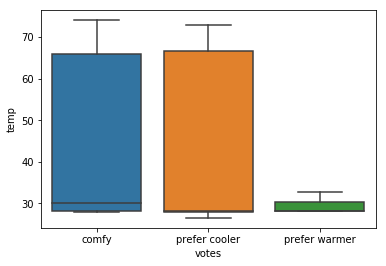

In [313]:
g = sns.boxplot(data=total_temp, y='temp', x='votes')
